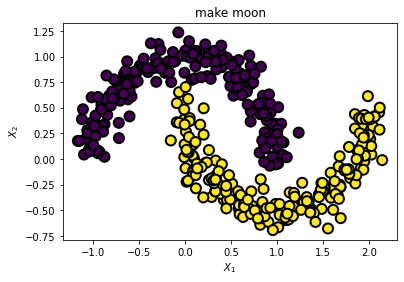

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

X,y=make_moons(n_samples=1000, noise=0.05)

plt.title("make moon")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [10]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [12]:
print(f"gm.weights_ \n {gm.weights_}")
print(f"gm.covariance_ \n {gm.covariances_}")

gm.weights_ 
 [0.21554529 0.22175008 0.56270463]
gm.covariance_ 
 [[[ 0.07199068  0.07324847]
  [ 0.07324847  0.10387018]]

 [[ 0.08347483  0.07527019]
  [ 0.07527019  0.09368734]]

 [[ 0.15730078 -0.07961031]
  [-0.07961031  0.28782731]]]


In [14]:
print(f"gm.converged_ \n {gm.converged_}")
print(f"gm.n_iter_ \n {gm.n_iter_}")

gm.converged_ 
 True
gm.n_iter_ 
 19


In [15]:
print(f"gm.score_samples(X) \n {gm.score_samples(X)}")

gm.score_samples(X) 
 [-0.82889604 -1.07601095 -0.5781479  -1.62691711 -1.99954932 -1.68610971
 -0.71876098 -1.9475925  -1.09975276 -1.93872469 -1.80938555 -0.86157821
 -1.22472379 -0.56635783 -1.45547825 -2.18586591 -2.14784367 -0.41848486
 -1.52896035 -2.50715385 -0.99700942 -1.61704131 -0.69275439 -0.44160672
 -1.8876052  -1.53897522 -1.68282484 -1.64396532 -1.91224981 -1.90126986
 -0.40382096 -1.44061251 -0.61244213 -1.63265132 -1.80898635 -1.9498052
 -2.14223827 -0.7092148  -2.91731682 -3.8780422  -2.04695663 -1.41978974
 -1.31866306 -1.56930543 -2.1361566  -1.11304424 -0.95890633 -1.30877096
 -0.81568762 -1.66488286 -1.59760118 -0.53871826 -1.99298388 -0.61888115
 -1.7367494  -2.27733409 -1.6860922  -1.83355246 -1.76550811 -1.24788593
 -1.73486358 -1.23411998 -1.99349124 -0.71916901 -1.63353628 -0.45014074
 -0.53695027 -1.38310104 -0.43905186 -2.10999366 -1.10728281 -1.4495115
 -1.70645522 -2.05378852 -1.80942457 -1.53482978 -0.81834546 -2.10947337
 -1.21399045 -0.73488155 -1.851

In [17]:
import numpy as np

In [19]:
densities=gm.score_samples(X)
density_thresold=np.percentile(densities, 4)
anomalies=X[densities<density_thresold]

In [20]:
anomalies

array([[-0.93084612,  0.06947491],
       [-0.72017582,  0.20451645],
       [ 1.98640503,  0.61368914],
       [ 1.84526984,  0.43842528],
       [ 0.69685917,  1.01048617],
       [-1.01661741,  0.60270888],
       [ 1.6909941 , -0.57643993],
       [ 1.23382487,  0.25777467],
       [ 0.01558543, -0.22171463],
       [-0.87738833,  0.02227185],
       [-1.1115044 ,  0.48599902],
       [ 1.55272522, -0.67752107],
       [ 0.82362333,  0.90069097],
       [ 2.14206043, -0.01049419],
       [-0.85623842,  0.81491168],
       [-0.94660723,  0.05618333]])

In [24]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

In [25]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

mixture_anomaly_detection_plot


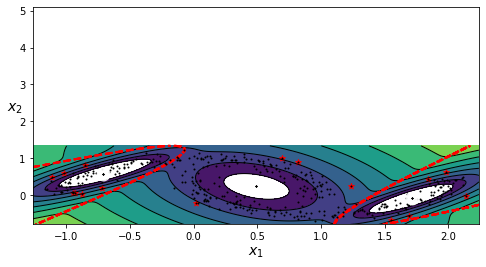

In [30]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

print("mixture_anomaly_detection_plot")
plt.show()